Text(0.5, 1.0, 'img gray')

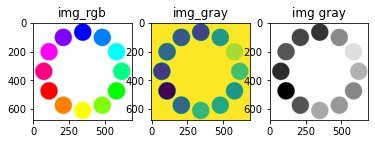

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img_rgb = cv.imread('circles.png')
img_gray = cv.imread('circles.png', cv.IMREAD_GRAYSCALE)
assert img_rgb is not None, "file could not be read, check with os.path.exists()"

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('img_rgb')

plt.subplot(1, 3, 2)
plt.imshow(img)
plt.title('img_gray')

plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')
plt.title('img gray')

In [9]:
img = img_gray
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',cimg)
cv.waitKey(0)
cv.destroyAllWindows()

KeyboardInterrupt: 

In [14]:
for i, center in enumerate(circles[0, :]):
    print(f"Center {i + 1}: ({center[0]}, {center[1]})\n")

Center 1: (74, 340)

Center 2: (344, 70)

Center 3: (344, 610)

Center 4: (614, 340)

Center 5: (110, 204)

Center 6: (110, 474)

Center 7: (210, 106)

Center 8: (480, 106)

Center 9: (480, 574)

Center 10: (578, 474)

Center 11: (210, 572)

Center 12: (580, 204)

